# Matplotlib for Stock Price

## Introduction
1. https://matplotlib.org/api/markers_api.html (마커) 
    - ^ (삼각형), O (원), s(세모), v(역삼각형), < , > , + , . , * , x
2. https://matplotlib.org/api/colors_api.html (컬러)
    - b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white

In [ ]:
x = range(0,100)
y = [v**2 for v in x]

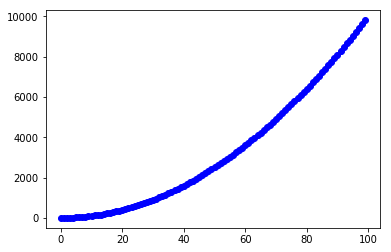

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y, 'bo')  # b : Blue , o : Circle

## Plots 여러개 그림
Axes 는 하나의 subplot 과 유사한 개념

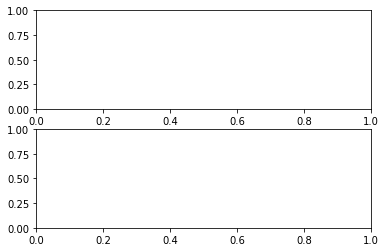

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)  # 2 X 1 행렬 그림 중 1번쨰
ax2 = fig.add_subplot(2, 1, 2)  # 2 X 1 행렬 그림 중 2번쨰

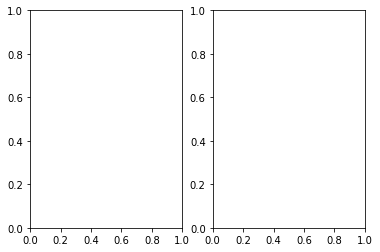

In [12]:
fig = plt.figure() # 설정선언 (이게 있어야 새로운 선언의 효과가 발생)
ax1 = fig.add_subplot(1, 2, 1)  # 2 X 1 행렬 그림 중 1번쨰
ax2 = fig.add_subplot(1, 2, 2)  # 2 X 1 행렬 그림 중 2번쨰
plt.show()

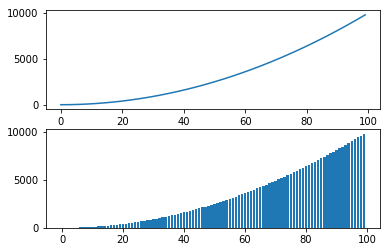

In [13]:
x = range(100)
y = [v**2 for v in x]

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(x,y)
ax2.bar(x,y)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 2 * np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

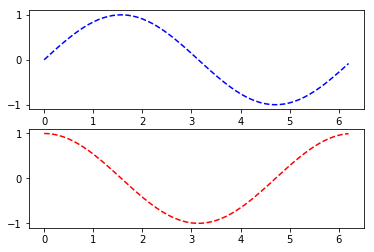

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')
plt.show()

## Label 붙이기
x, y 축 이름 붙이기

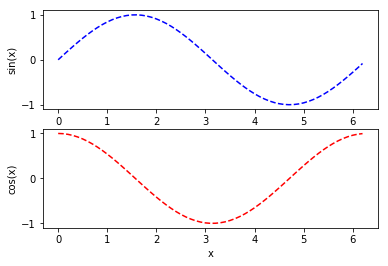

In [26]:
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
plt.show()

## 주가자료 시각화
x, y 축 이름 붙이기

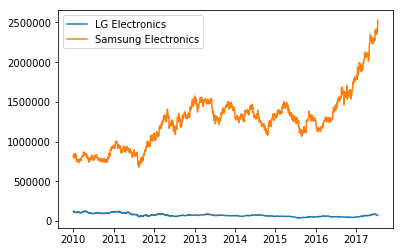

In [31]:
from pandas_datareader import get_data_google
lg = get_data_google("KRX:066570")
samsung = get_data_google("KRX:005930")

plt.plot(lg.index, lg['Close'], label='LG Electronics')
plt.plot(samsung.index, samsung['Close'], label='Samsung Electronics')
plt.legend(loc='upper left')
plt.show()

## Fig status : 메인객체
   -- AxesSubplot : 내부 부분객체
   - Axis : x, y 축

### Image 1

Figure(432x288)


matplotlib.axes._subplots.AxesSubplot

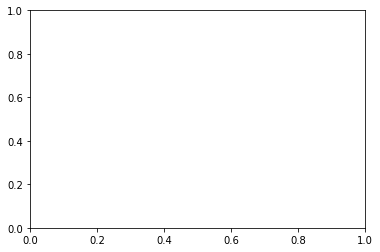

In [35]:
# 비어있는 객체를 생성 (이미지 초기화)
fig = plt.figure()
print(fig)
# fig에 종속된 AxesSubplot 1개를 생성
ax = fig.add_subplot(1,1,1)
type(ax)

### Image 2 X 2 : 총 4개

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a4a6e1f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6a4aedd630>]], dtype=object)

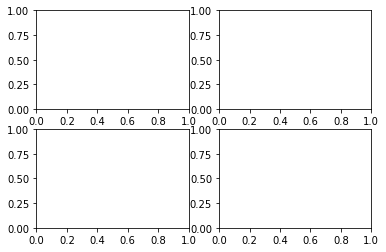

In [47]:
# 비어있는 객체를 생성 (이미지 초기화)
fig, ax = plt.subplots(2,2)
# fig에 종속된 AxesSubplot 1개를 생성
# ax[0][0] ~  ax[1][1]
ax 
# 이미 한번 화면에 출력되고 나면, 다시 생성을 해야 그림을 그릴 수 있다

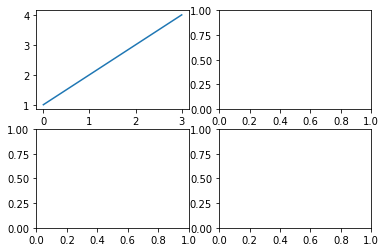

In [46]:
fig, ax = plt.subplots(2,2)
ax[0][0].plot([1,2,3,4])
plt.show()

## subplot2grid() 함수를 활용
- 총 4 X 4 크기의 파레트 위에 0,0 에서 시작// 두번쨰는 3,0에서 시작 (그림의 크기를 결정)

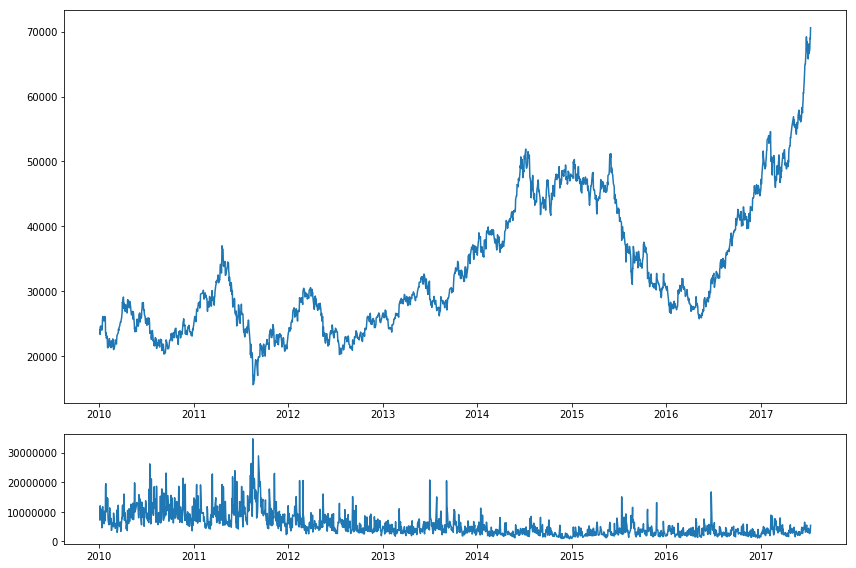

In [49]:
import matplotlib.pyplot as plt
from pandas_datareader import get_data_google
sk_hynix = get_data_google("KRS:000660")

fig = plt.figure(figsize=(12, 8)) # 이미지 객체를 1개생성, 대신 크기값 지정
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(sk_hynix.index, sk_hynix['Close'], label='Adjusted Close')
bottom_axes.plot(sk_hynix.index, sk_hynix['Volume'])

plt.tight_layout() # 자동으로 최대크기의 그림으로 출력
plt.show()


## Candle Chart
matplotlib.finance

### Introduction

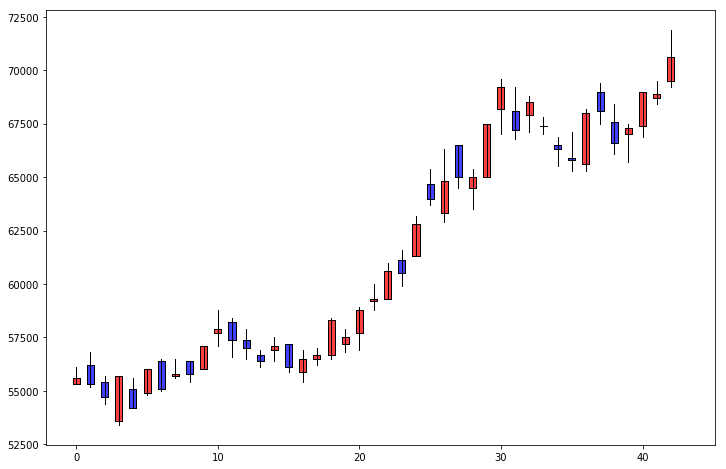

In [55]:
import matplotlib.finance as matfin
skhynix = get_data_google("KRS:000660",'2017-5-14','2017-7-14')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
matfin.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'],
                         width=0.5, colorup='r', colordown='b')
plt.show()

### X 축 label 하기

In [58]:
# 날짜정보 출력하기
skhynix.index[0].strftime('%Y-%m-%d')

'2017-05-15'

In [70]:
day_list = range(len(skhynix))

name_list = []
for day in skhynix.index:
    name_list.append(day.strftime('%d'))

name_list[::10]

['15', '29', '13', '27', '11']

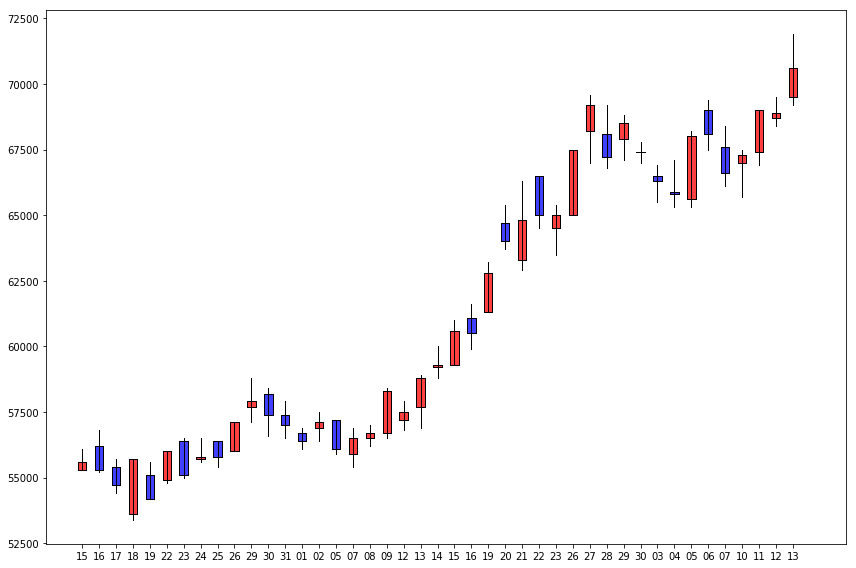

In [68]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

matfin.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'],
                         width=0.5, colorup='r', colordown='b')
plt.tight_layout()
plt.show()

### X 축 label 하기 2
매주 월요일에만 날짜 출력하기

In [89]:
name_list , day_list = [], []

for i , day in enumerate(skhynix.index):
    if day.dayofweek == 0:      #  TimeStamp.dayofweek ( 0 Mon, 1 Tue....) 요일을 숫자로 계산해서 출력
        day_list.append(i)
        name_list.append(day.strftime('%m-%d') + '(M)')

In [85]:
day_list

[0, 5, 10, 15, 19, 24, 29, 34, 39]

In [84]:
name_list

['2017-05-15(Mon)',
 '2017-05-22(Mon)',
 '2017-05-29(Mon)',
 '2017-06-05(Mon)',
 '2017-06-12(Mon)',
 '2017-06-19(Mon)',
 '2017-06-26(Mon)',
 '2017-07-03(Mon)',
 '2017-07-10(Mon)']

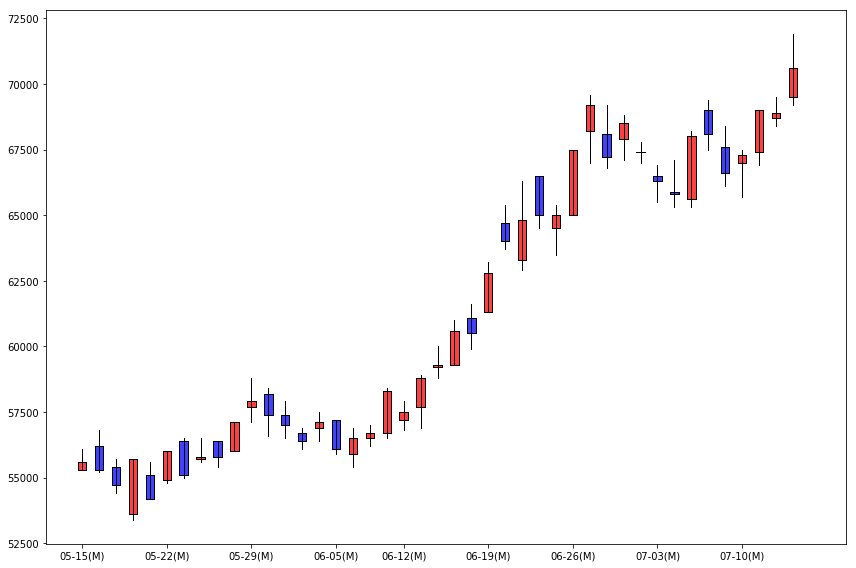

In [90]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))
matfin.candlestick2_ohlc(ax, skhynix['Open'], skhynix['High'], skhynix['Low'], skhynix['Close'],
                         width=0.5, colorup='r', colordown='b')
plt.tight_layout()
plt.show()

## Bar Chart
matplotlib.finance

In [ ]:
from matplotlib import font_manager, rc
from matplotlib import style

rc('font', family='NanumGothic');
style.use('ggplot') # 스타일을 지정 (plt 정의 전에 미리 선언을 해야 적용)

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

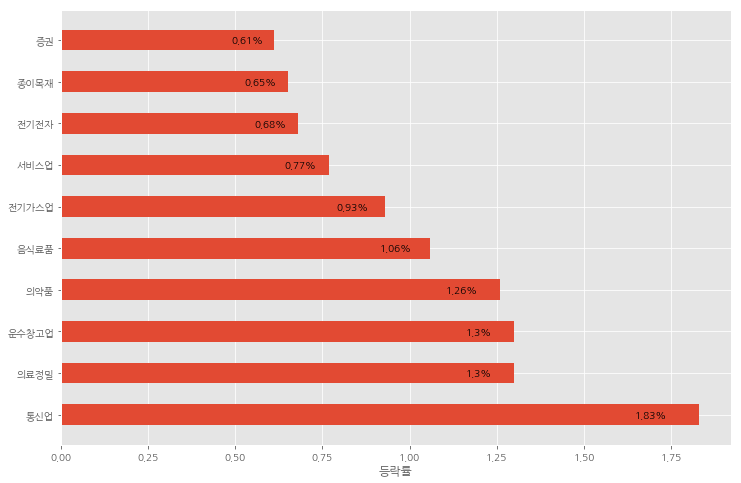

In [98]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Y 축에 인덱스 정의하기 
ypos = np.arange(len(industry))
# plt.barh() : bar 차트에서 bar와 같은 개념
rects = plt.barh(ypos, fluctuations, align='center', height=0.5)
plt.yticks(ypos, industry)  

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2,\
            str(fluctuations[i]) + '%', ha='right', va='center')

plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('등락률')
plt.show()ㅠㅠㅠ

### X 축 label 하기 2
매주 월요일에만 날짜 출력하기

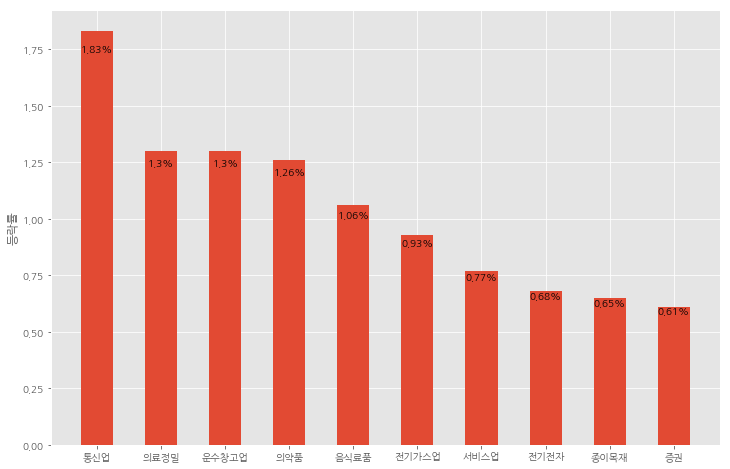

In [105]:
industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
pos = np.arange(len(industry))
rects = plt.bar(pos, fluctuations, align='center', width=0.5)
plt.xticks(pos, industry)

for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(fluctuations[i]) + '%', ha='center')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('등락률')
plt.show()

## Pie Chart
파이차트 그리기

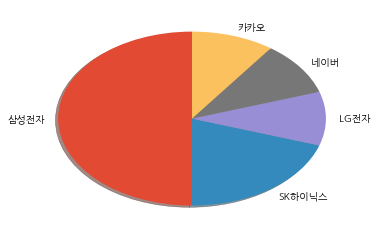

In [114]:
style.use('ggplot')

labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]

# plt.pie(data, label, 
#   stratangle : 시작점(3시지점)의 90도(12시방향) 에서 그림을 그리기 시작( 반시계방향 )
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

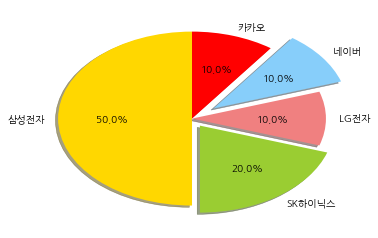

In [118]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]
explode = (0.0, 0.1, 0.0, 0.2, 0.) # 확대값 : 중심축 이탈 거리값 지정 

plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()